In [1]:
from subprocess import PIPE, run
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

%matplotlib inline

# Let's read the EXIF metadata using the exiftool
### The images used in this notebooks we're taken using a Google Pixel 3 XL in Portrait mode
- Let's read the `ImageData` part of the exif metadata as binary (which contains the original RGB image without the depth of field effect applied
- Let's read the `Data` part of the exif metadata as binary (which contains the depth map
- Write/use the depth image

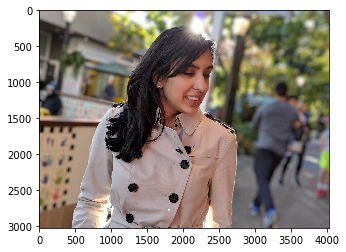

In [13]:
# Read the original image
original_file_path = '../samples/pixel_portait_ORIGINAL.jpg'
original_rgb = Image.open(original_file_path)

# Show it!
plt.imshow(original_rgb)
plt.show()

### Run `exiftool` and grab the binary image data from the EXIF metadata

In [14]:
image_data_from_exif = run(['exiftool', '-b', '-ImageData', original_file_path], stdout=PIPE)
depth_data_from_exif = run(['exiftool', '-b', '-Data', original_file_path], stdout=PIPE)

### If you want to write the depthmap to disk as an image simply run:
```
with open('../samples/depthmap.jpg', 'wb') as newFile:
    newFile.write(image_data_from_exif.stdout)
```

In [15]:
original_rgb_no_dof = Image.open(BytesIO(image_data_from_exif.stdout))
original_depth = Image.open(BytesIO(depth_data_from_exif.stdout))

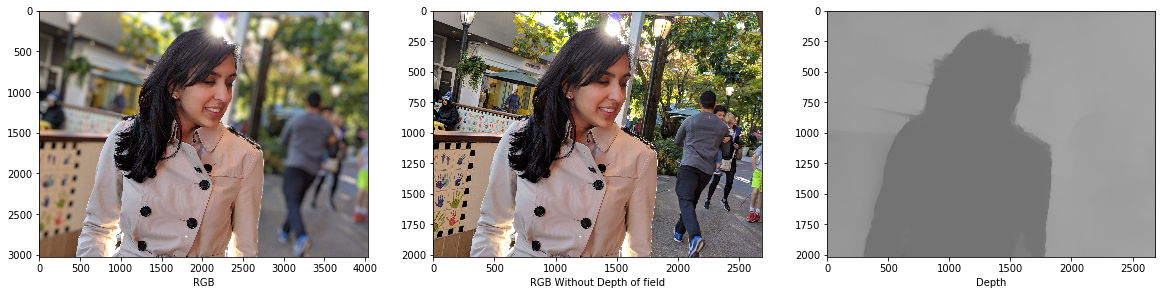

In [17]:
f = plt.figure(figsize=(20, 20))
f.add_subplot(1,3, 1)
plt.imshow(original_rgb)
plt.xlabel('RGB')
f.add_subplot(1,3, 2)
plt.imshow(original_rgb_no_dof)
plt.xlabel('RGB Without Depth of field')
f.add_subplot(1,3, 3)
plt.imshow(original_depth)
plt.xlabel('Depth')
plt.show()